## Imports

In [1]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")

from src.load_explanations import load_explanations_of_many_models, _unify_lenths, _trim_image_path
from src import strings_to_classes_mappings

from src.compare_explanations import compare_explanations, cosine_similarity_distance_with_stdev_and_mean, radial_basis_function_distance_with_stdev_and_mean
from src.load_explanations import load_explanations_of_many_models

os.chdir(current_file_dir)

# Usage example

Get possible models etc.

In [2]:
print("Possible datasets:", list(strings_to_classes_mappings.datasets_mapping.keys()))
print("Possible models:", list(strings_to_classes_mappings.models_mapping.keys()))
print("Possible explanations:", list(strings_to_classes_mappings.explanations_mapping.keys()))
models_list = list(strings_to_classes_mappings.models_mapping.keys())

Possible datasets: ['imagenette2']
Possible models: ['ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'DenseNet121', 'EfficientNet_B3', 'EfficientNet_B4', 'MobileNetV3', 'PyramidViT_V2_B2', 'Res2Net50', 'ResNet18', 'ResNet50', 'ResNeXt50', 'Swin_T', 'ViT_B_32']
Possible explanations: ['GradCAM', 'IntegratedGradients', 'KernelSHAP']


# Loading data

In [3]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")
from src.utils import models_to_architecture_mapping
os.chdir(current_file_dir)

In [5]:
similarity_matriced_csvs = [f for f in os.listdir('.') if f.endswith('.csv') and f.startswith('dissimilarity_matrix') and 'integratedgradients' in f]
similarity_matriced_csvs

['dissimilarity_matrix_integratedgradients_cosine.csv',
 'dissimilarity_matrix_integratedgradients_rbf.csv']

## Heatmaps of dissimilarities

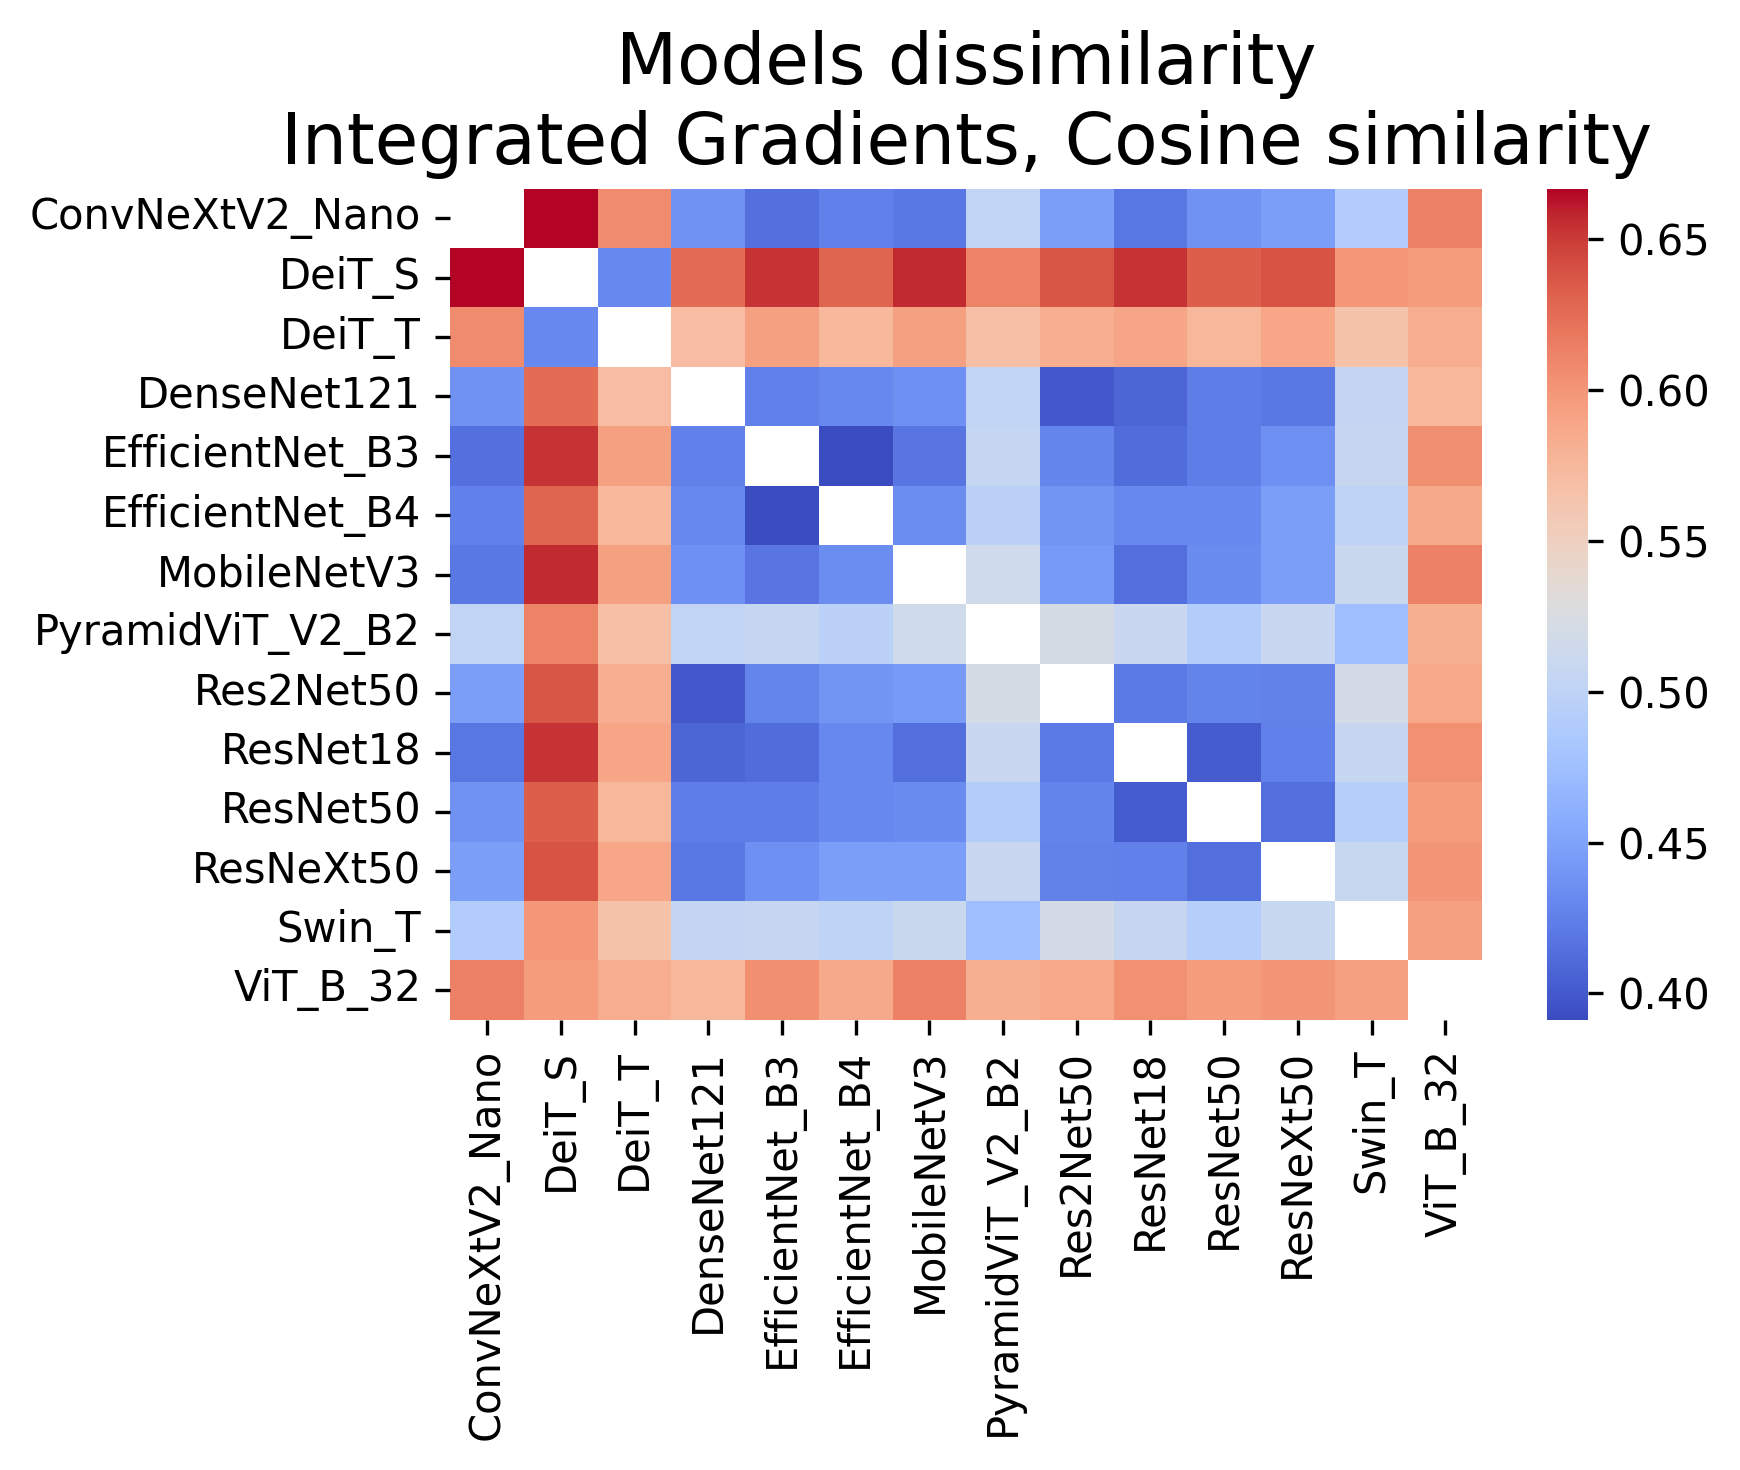

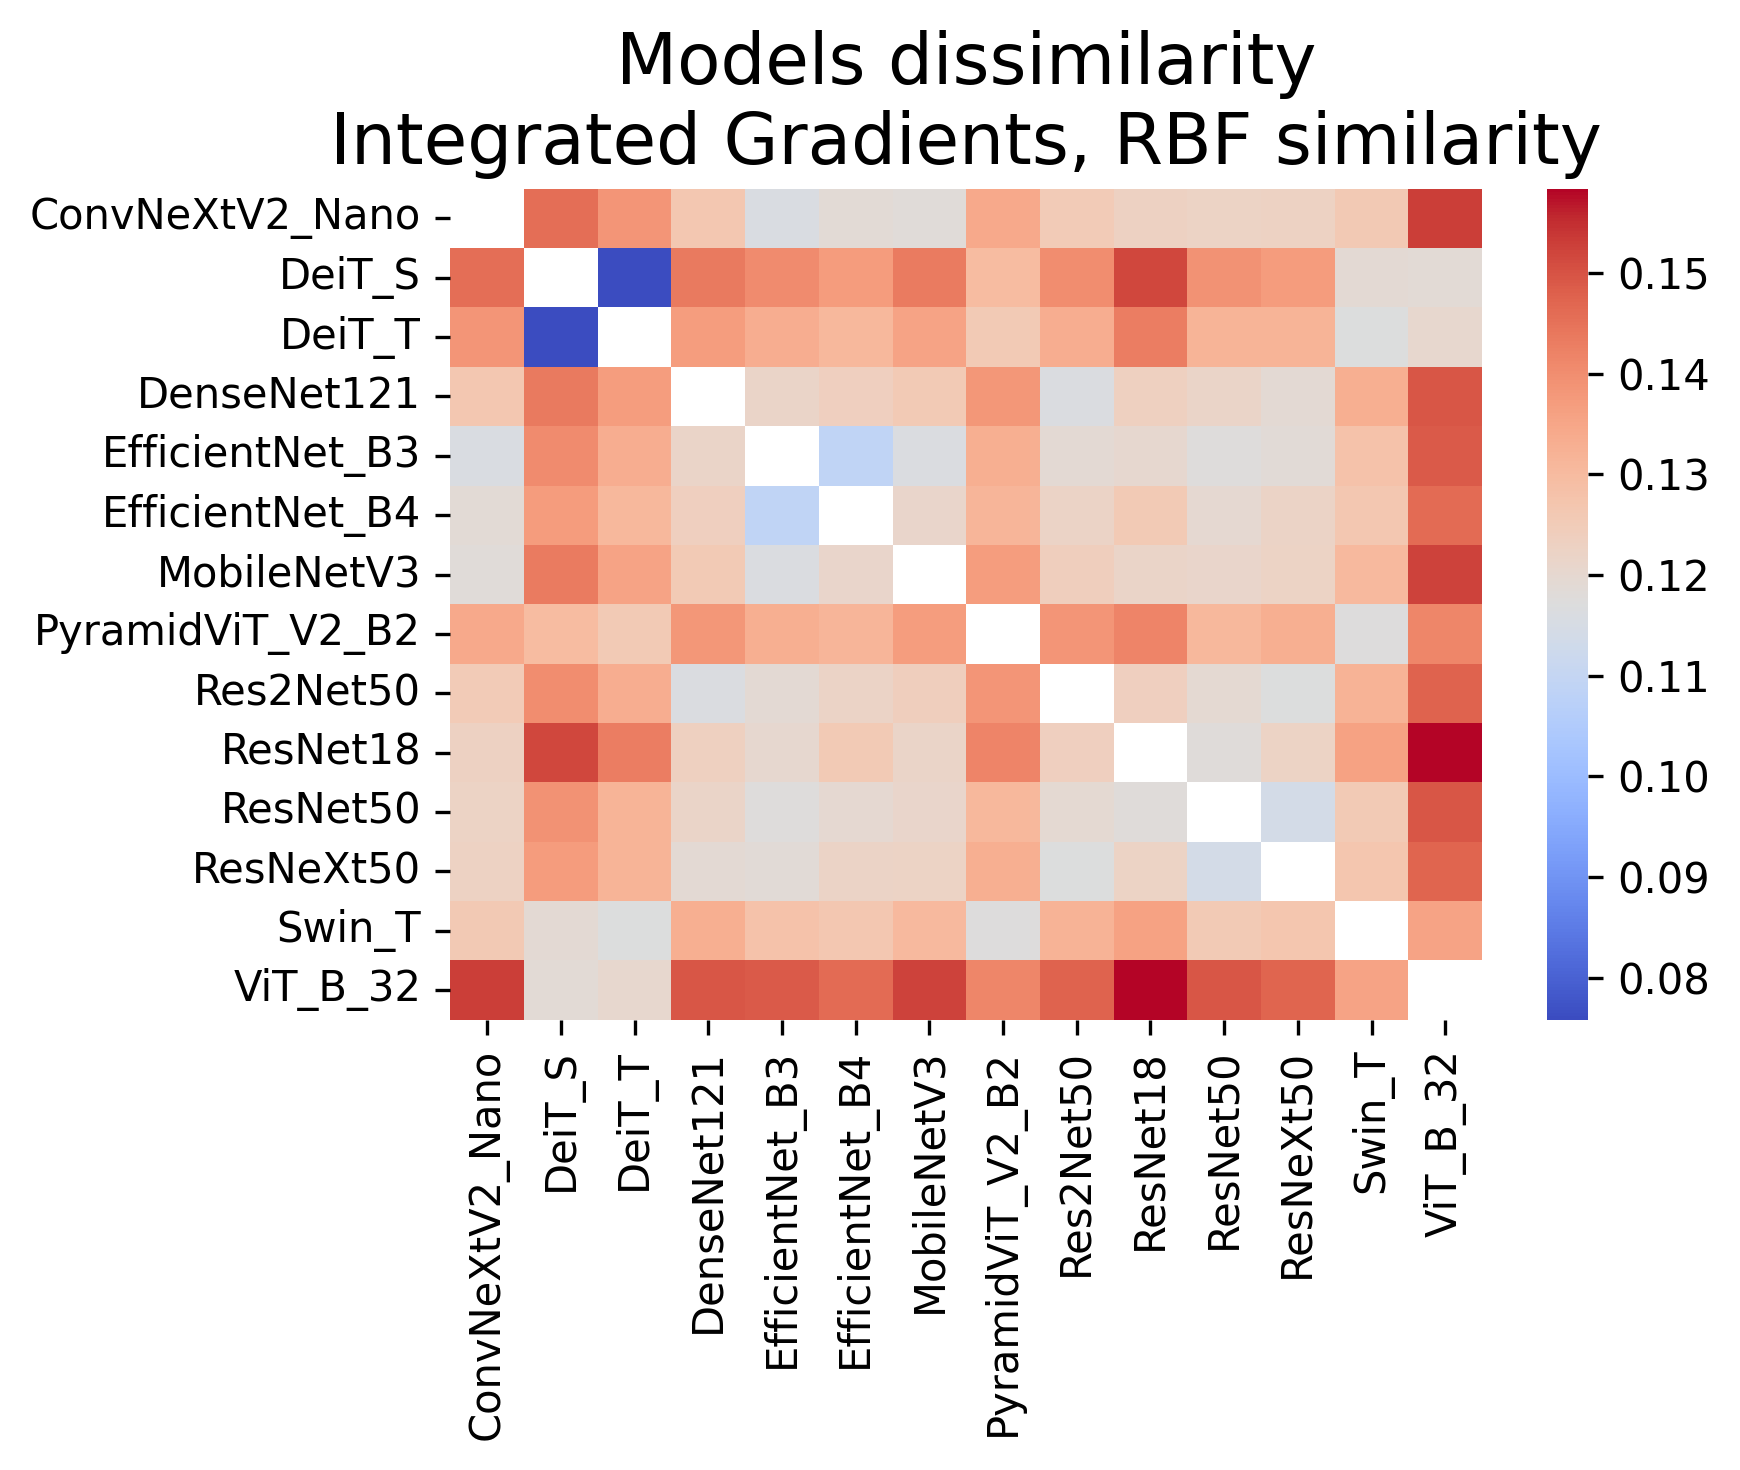

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title, output_filename):
    mask = np.eye(df.shape[0], dtype=bool)
    fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
    sns.heatmap(df, mask=mask, cmap='coolwarm', ax=ax)
    plt.title(title, fontsize=17)
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
dissimilarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

# for csv_name in similarity_matriced_csvs:
#     splitted = csv_name.split('_')
#     explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
#     title = f"Graph community detection - Louvain\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models dissimilarity\n{explanation_name_mapping[explanation_method]}, {dissimilarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
    df = pd.read_csv(csv_name, index_col=0)
    plot_heatmap(df, title=title, output_filename=f"heatmap_{explanation_method}_{similarity_metric}.png")

# Community detection - Louvain

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_partitions, louvain_communities

df = 1 - pd.read_csv(similarity_matriced_csvs[1], index_col=0)

# Remove diagonal and create graph
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          0.000000  0.854352  0.861604     0.873528   
DeiT_S                   0.854352  0.000000  0.924181     0.856159   
DeiT_T                   0.861604  0.924181  0.000000     0.862935   
DenseNet121              0.873528  0.856159  0.862935     0.000000   
EfficientNet_B3          0.884158  0.859496  0.866678     0.878293   
EfficientNet_B4          0.881086  0.862824  0.869026     0.876356   
MobileNetV3              0.881642  0.856465  0.864394     0.874190   
PyramidViT_V2_B2         0.865782  0.870141  0.874337     0.861725   
Res2Net50                0.874671  0.859947  0.866523     0.883850   
ResNet18                 0.876879  0.848247  0.856815     0.876660   
ResNet50                 0.877711  0.860943  0.868293     0.878236   
ResNeXt50                0.877317  0.862738  0.868224     0.880642   
Swin_T                   0.874052  0.880922  0.883040     0.866804   
ViT_B_32                 0.847040  0.881238  0.879549     0.850485   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.884158         0.881086     0.881642   
DeiT_S                   0.859496         0.862824     0.856465   
DeiT_T                   0.866678         0.869026     0.864394   
DenseNet121              0.878293         0.876356     0.874190   
EfficientNet_B3          0.000000         0.891061     0.883729   
EfficientNet_B4          0.891061         0.000000     0.878903   
MobileNetV3              0.883729         0.878903     0.000000   
PyramidViT_V2_B2         0.866790         0.868390     0.863074   
Res2Net50                0.880655         0.877735     0.875858   
ResNet18                 0.879819         0.874450     0.878059   
ResNet50                 0.882473         0.880095     0.879000   
ResNeXt50                0.881487         0.877975     0.877433   
Swin_T                   0.872067         0.873238     0.869651   
ViT_B_32                 0.851020         0.853854     0.847454   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.865782   0.874671  0.876879  0.877711   0.877317   
DeiT_S                    0.870141   0.859947  0.848247  0.860943   0.862738   
DeiT_T                    0.874337   0.866523  0.856815  0.868293   0.868224   
DenseNet121               0.861725   0.883850  0.876660  0.878236   0.880642   
EfficientNet_B3           0.866790   0.880655  0.879819  0.882473   0.881487   
EfficientNet_B4           0.868390   0.877735  0.874450  0.880095   0.877975   
MobileNetV3               0.863074   0.875858  0.878059  0.879000   0.877433   
PyramidViT_V2_B2          0.000000   0.861602  0.858291  0.869206   0.866952   
Res2Net50                 0.861602   0.000000  0.876292  0.880394   0.882955   
ResNet18                  0.858291   0.876292  0.000000  0.881946   0.877602   
ResNet50                  0.869206   0.880394  0.881946  0.000000   0.886105   
ResNeXt50                 0.866952   0.882955  0.877602  0.886105   0.000000   
Swin_T                    0.882751   0.868010  0.864016  0.874187   0.872945   
ViT_B_32                  0.858655   0.852382  0.841606  0.850548   0.852798   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.874052  0.847040  
DeiT_S            0.880922  0.881238  
DeiT_T            0.883040  0.879549  
DenseNet121       0.866804  0.850485  
EfficientNet_B3   0.872067  0.851020  
EfficientNet_B4   0.873238  0.853854  
MobileNetV3       0.869651  0.847454  
PyramidViT_V2_B2  0.882751  0.858655  
Res2Net50         0.868010  0.852382  
ResNet18          0.864016  0.841606  
ResNet50          0.874187  0.850548  
ResNeXt50         0.872945  0.852798  
Swin_T            0.000000  0.864278  
ViT_B_32          0.864278  0.000000

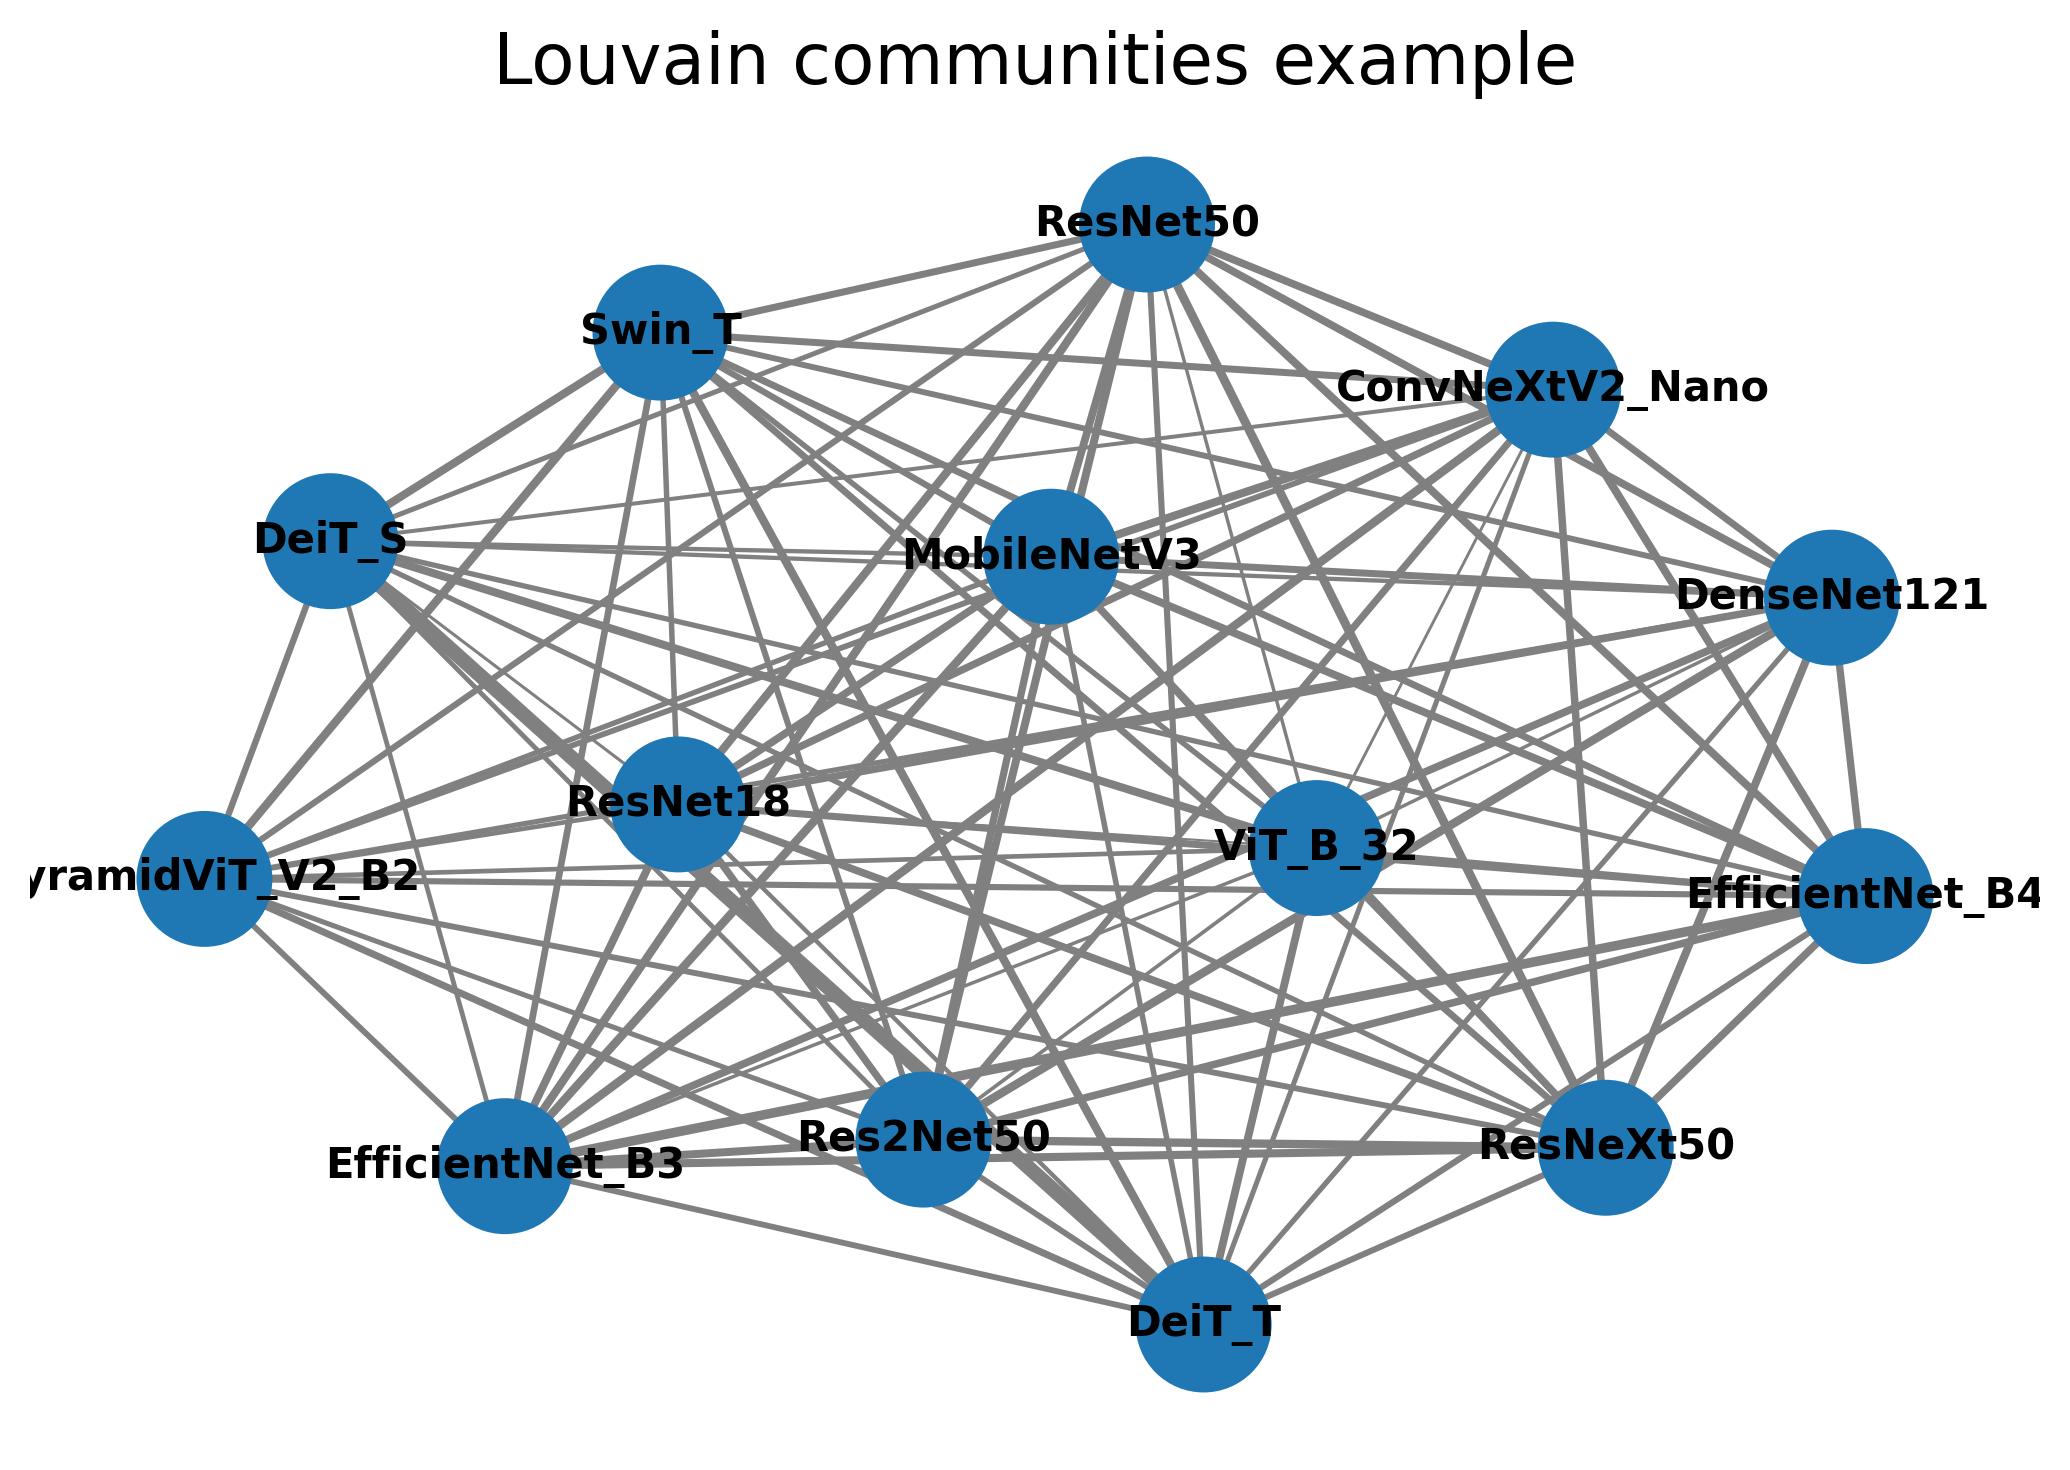

[{'ConvNeXtV2_Nano',
  'DeiT_S',
  'DeiT_T',
  'DenseNet121',
  'EfficientNet_B3',
  'EfficientNet_B4',
  'MobileNetV3',
  'PyramidViT_V2_B2',
  'Res2Net50',
  'ResNeXt50',
  'ResNet18',
  'ResNet50',
  'Swin_T',
  'ViT_B_32'}]

In [9]:
def get_weights_for_plot(G):
    # return a list of weights for plotting
    # before, scale them to values from 0.5 3.5
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    min_weight = min(weights)
    max_weight = max(weights)
    weights = [(w - min_weight) / (max_weight - min_weight) for w in weights]
    weights = [0.5 + 3 * w for w in weights]
    return weights


def plot_communities(communities, title, output_filename=None, dpi=300):

    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    colors = [node_colors[node] for node in G.nodes]
    plt.figure(figsize=(7,5), dpi=dpi)
    ax = plt.gca()
    ax.set_title(title, fontsize=17)
    weights = get_weights_for_plot(G)
    nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.tab20, 
            node_size=1000, font_size=10, font_color='black', 
            edge_color='gray', font_weight='bold', ax=ax,
            pos=nx.spring_layout(G, scale=3),
            width=weights)

    _ = ax.axis('off')
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


communities = louvain_communities(G, seed=42)
plot_communities(communities, title="Louvain communities example")
communities

In [10]:
tweaked_csv_name_to_resolution_mapping = {
    'dissimilarity_matrix_gradcam_cosine.csv' : 1.06,
    'dissimilarity_matrix_gradcam_rbf.csv' : 1.08,
    'dissimilarity_matrix_integratedgradients_cosine.csv' : 0.807,
    'dissimilarity_matrix_integratedgradients_rbf.csv': 1,
    'dissimilarity_matrix_kernelshap_cosine.csv': 1.075,
    'dissimilarity_matrix_kernelshap_rbf.csv': 1.075,
}

dissimilarity_matrix_integratedgradients_rbf.csv


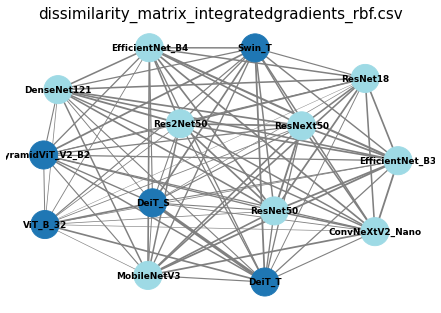

In [12]:
i_to_plot = 1
print(similarity_matriced_csvs[i_to_plot])
df = 1 - pd.read_csv(similarity_matriced_csvs[i_to_plot], index_col=0)
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
resolution = 1.075
communities = louvain_communities(G, resolution=resolution, seed=42)
plot_communities(communities, title=similarity_matriced_csvs[i_to_plot], dpi=64)

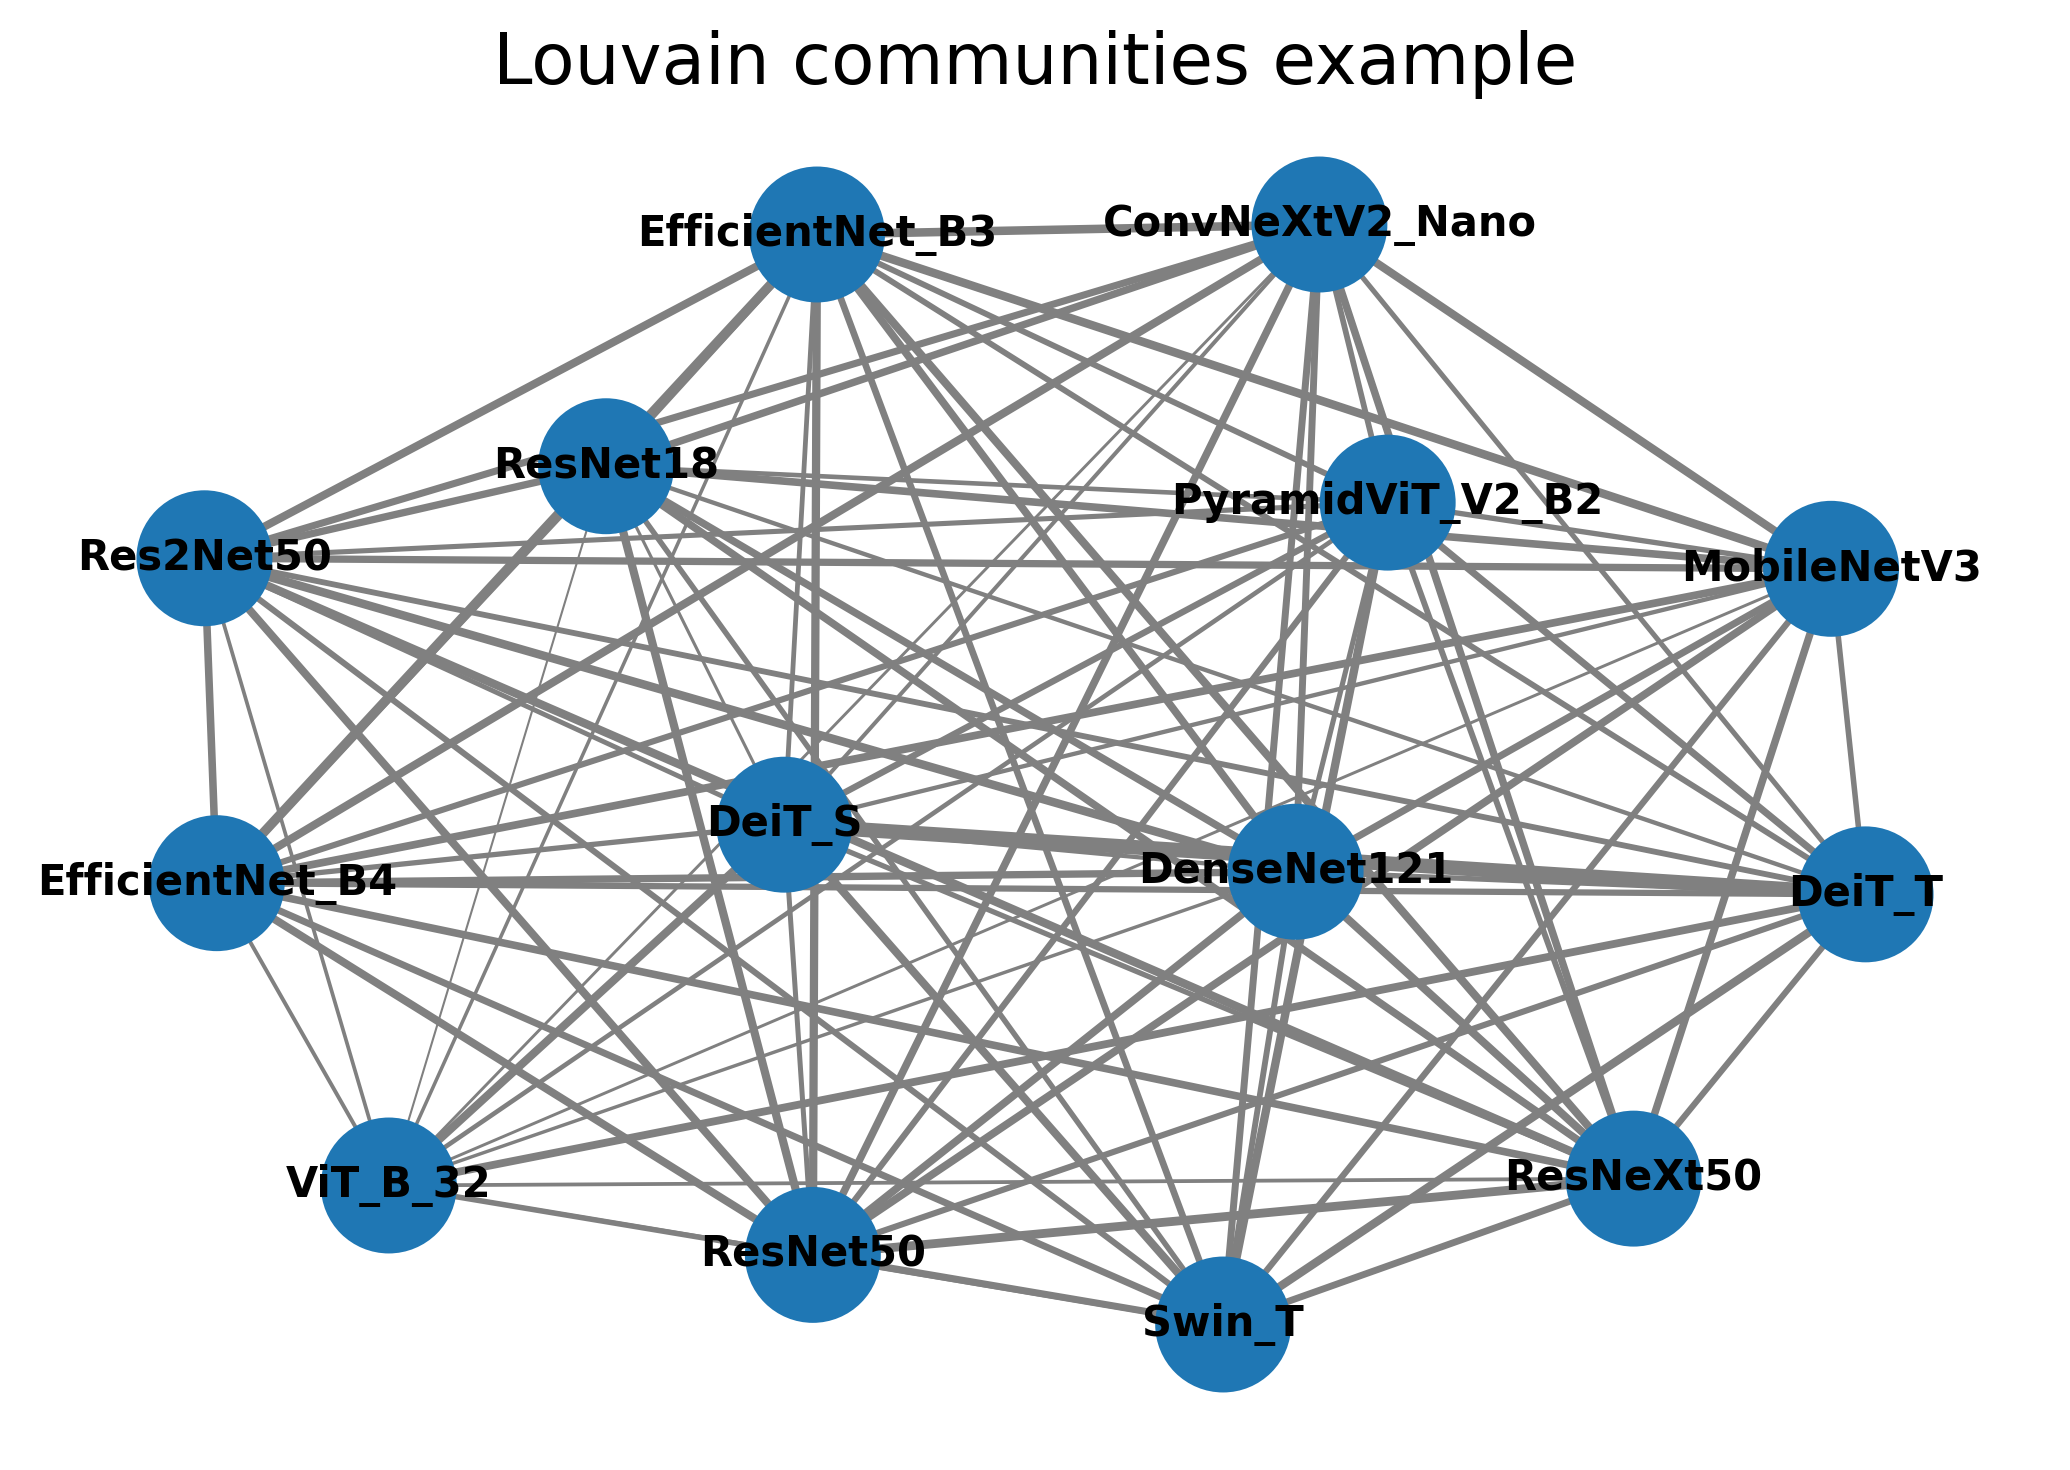

[[{'ConvNeXtV2_Nano',
   'DeiT_S',
   'DeiT_T',
   'DenseNet121',
   'EfficientNet_B3',
   'EfficientNet_B4',
   'MobileNetV3',
   'PyramidViT_V2_B2',
   'Res2Net50',
   'ResNeXt50',
   'ResNet18',
   'ResNet50',
   'Swin_T',
   'ViT_B_32'}]]

In [13]:
communities = list(louvain_partitions(G, resolution=1, threshold=0.0000000001))
for c in communities:
    plot_communities(c, title="Louvain communities example")
communities

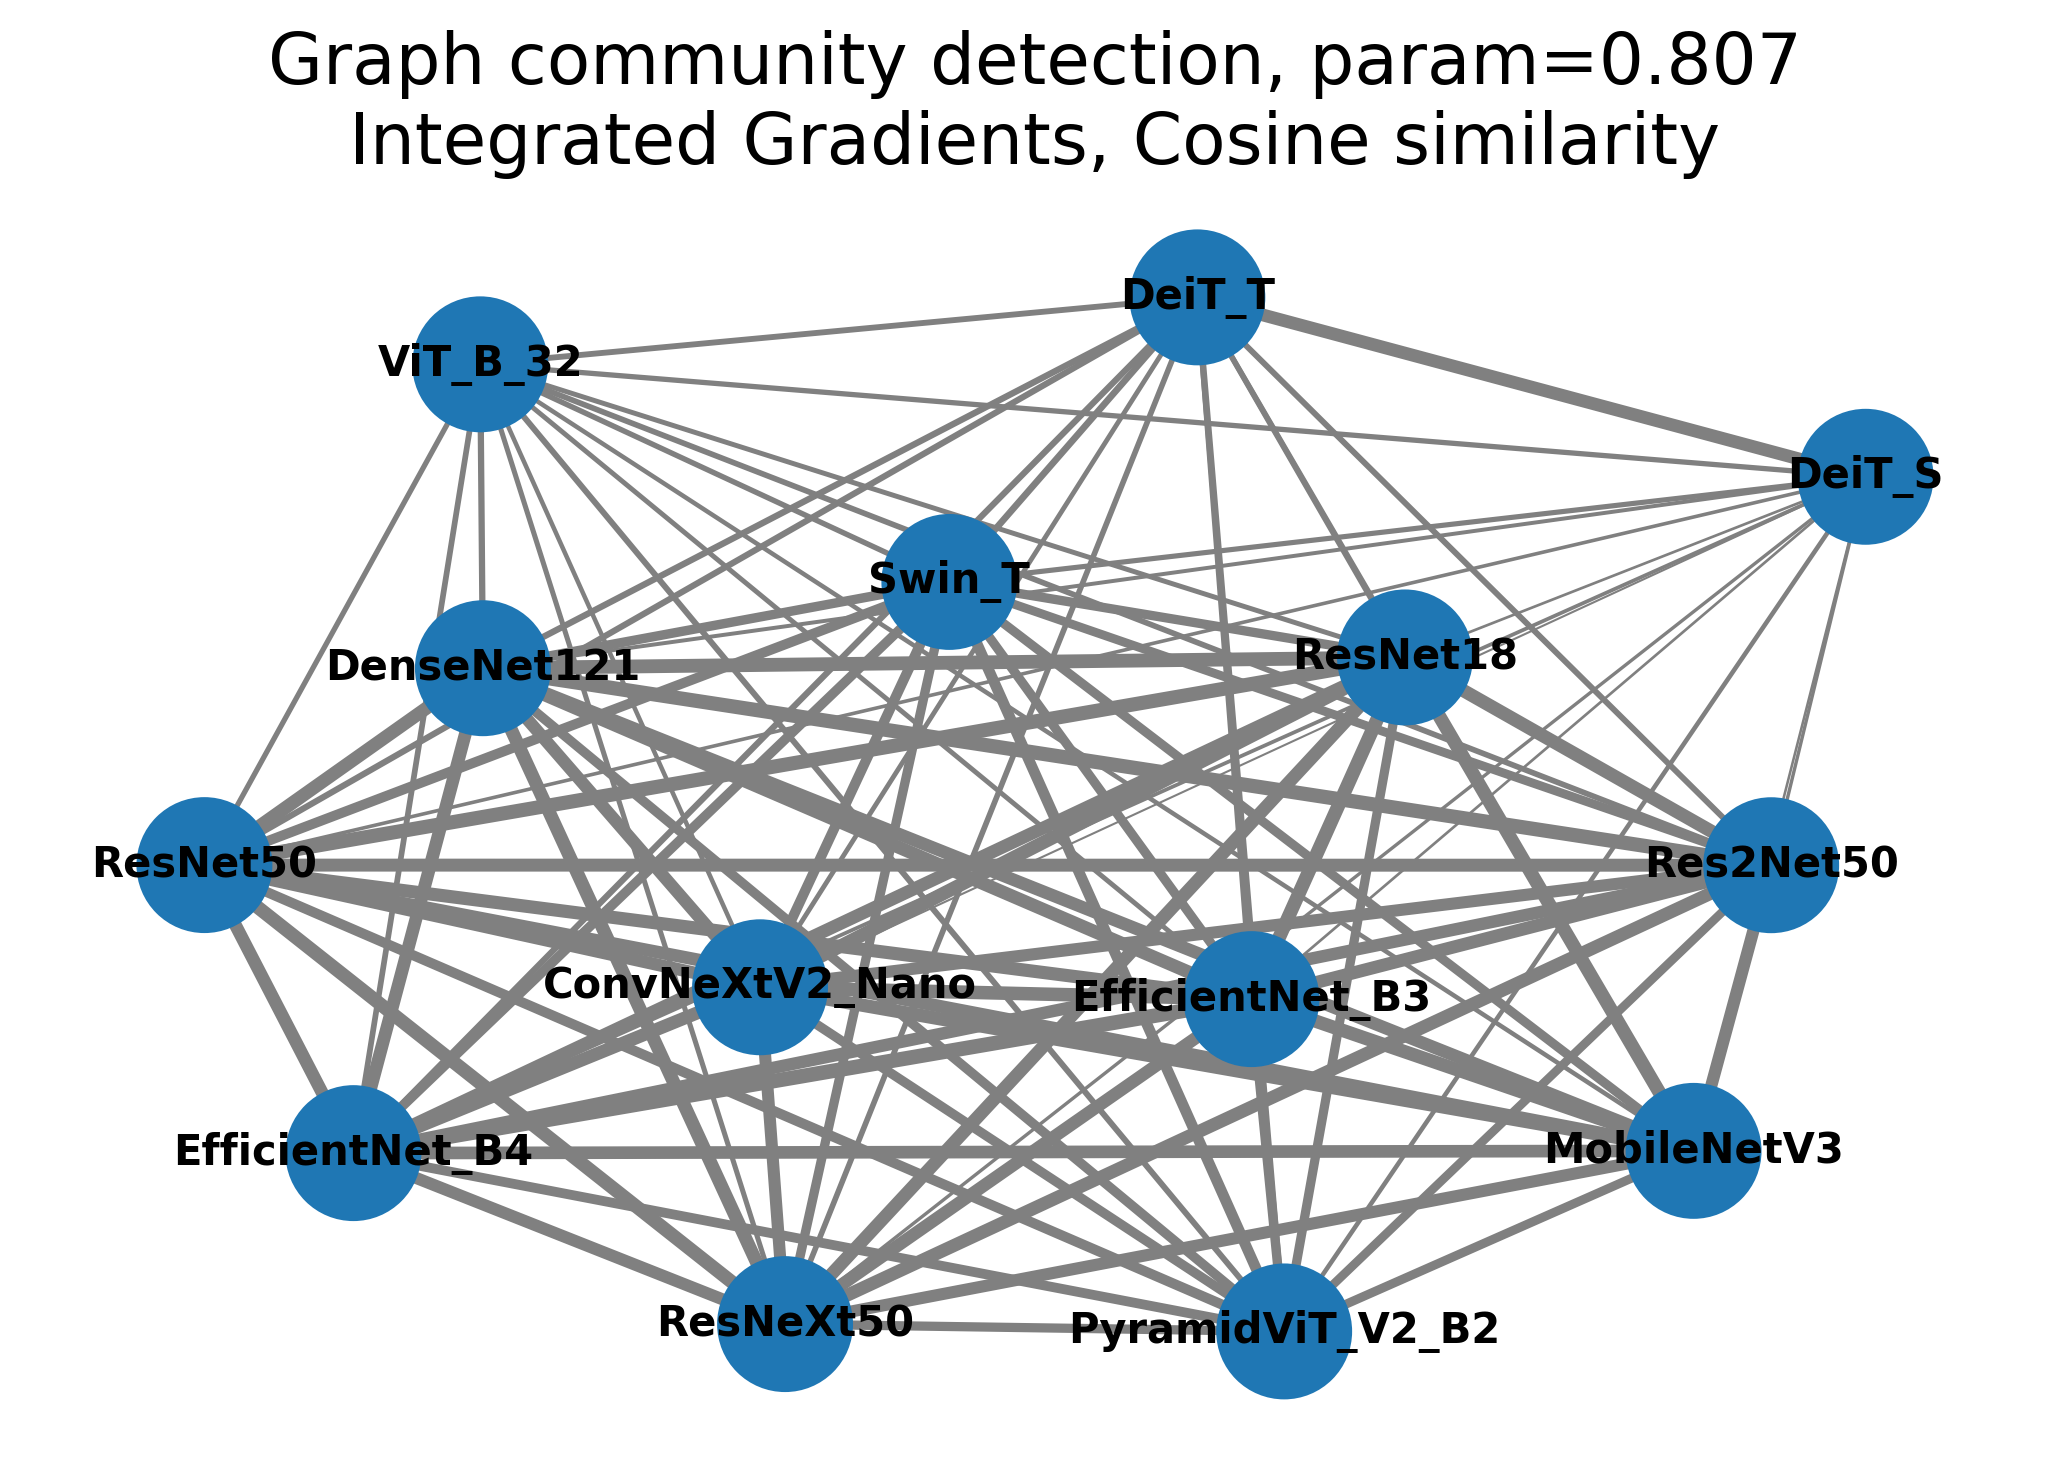

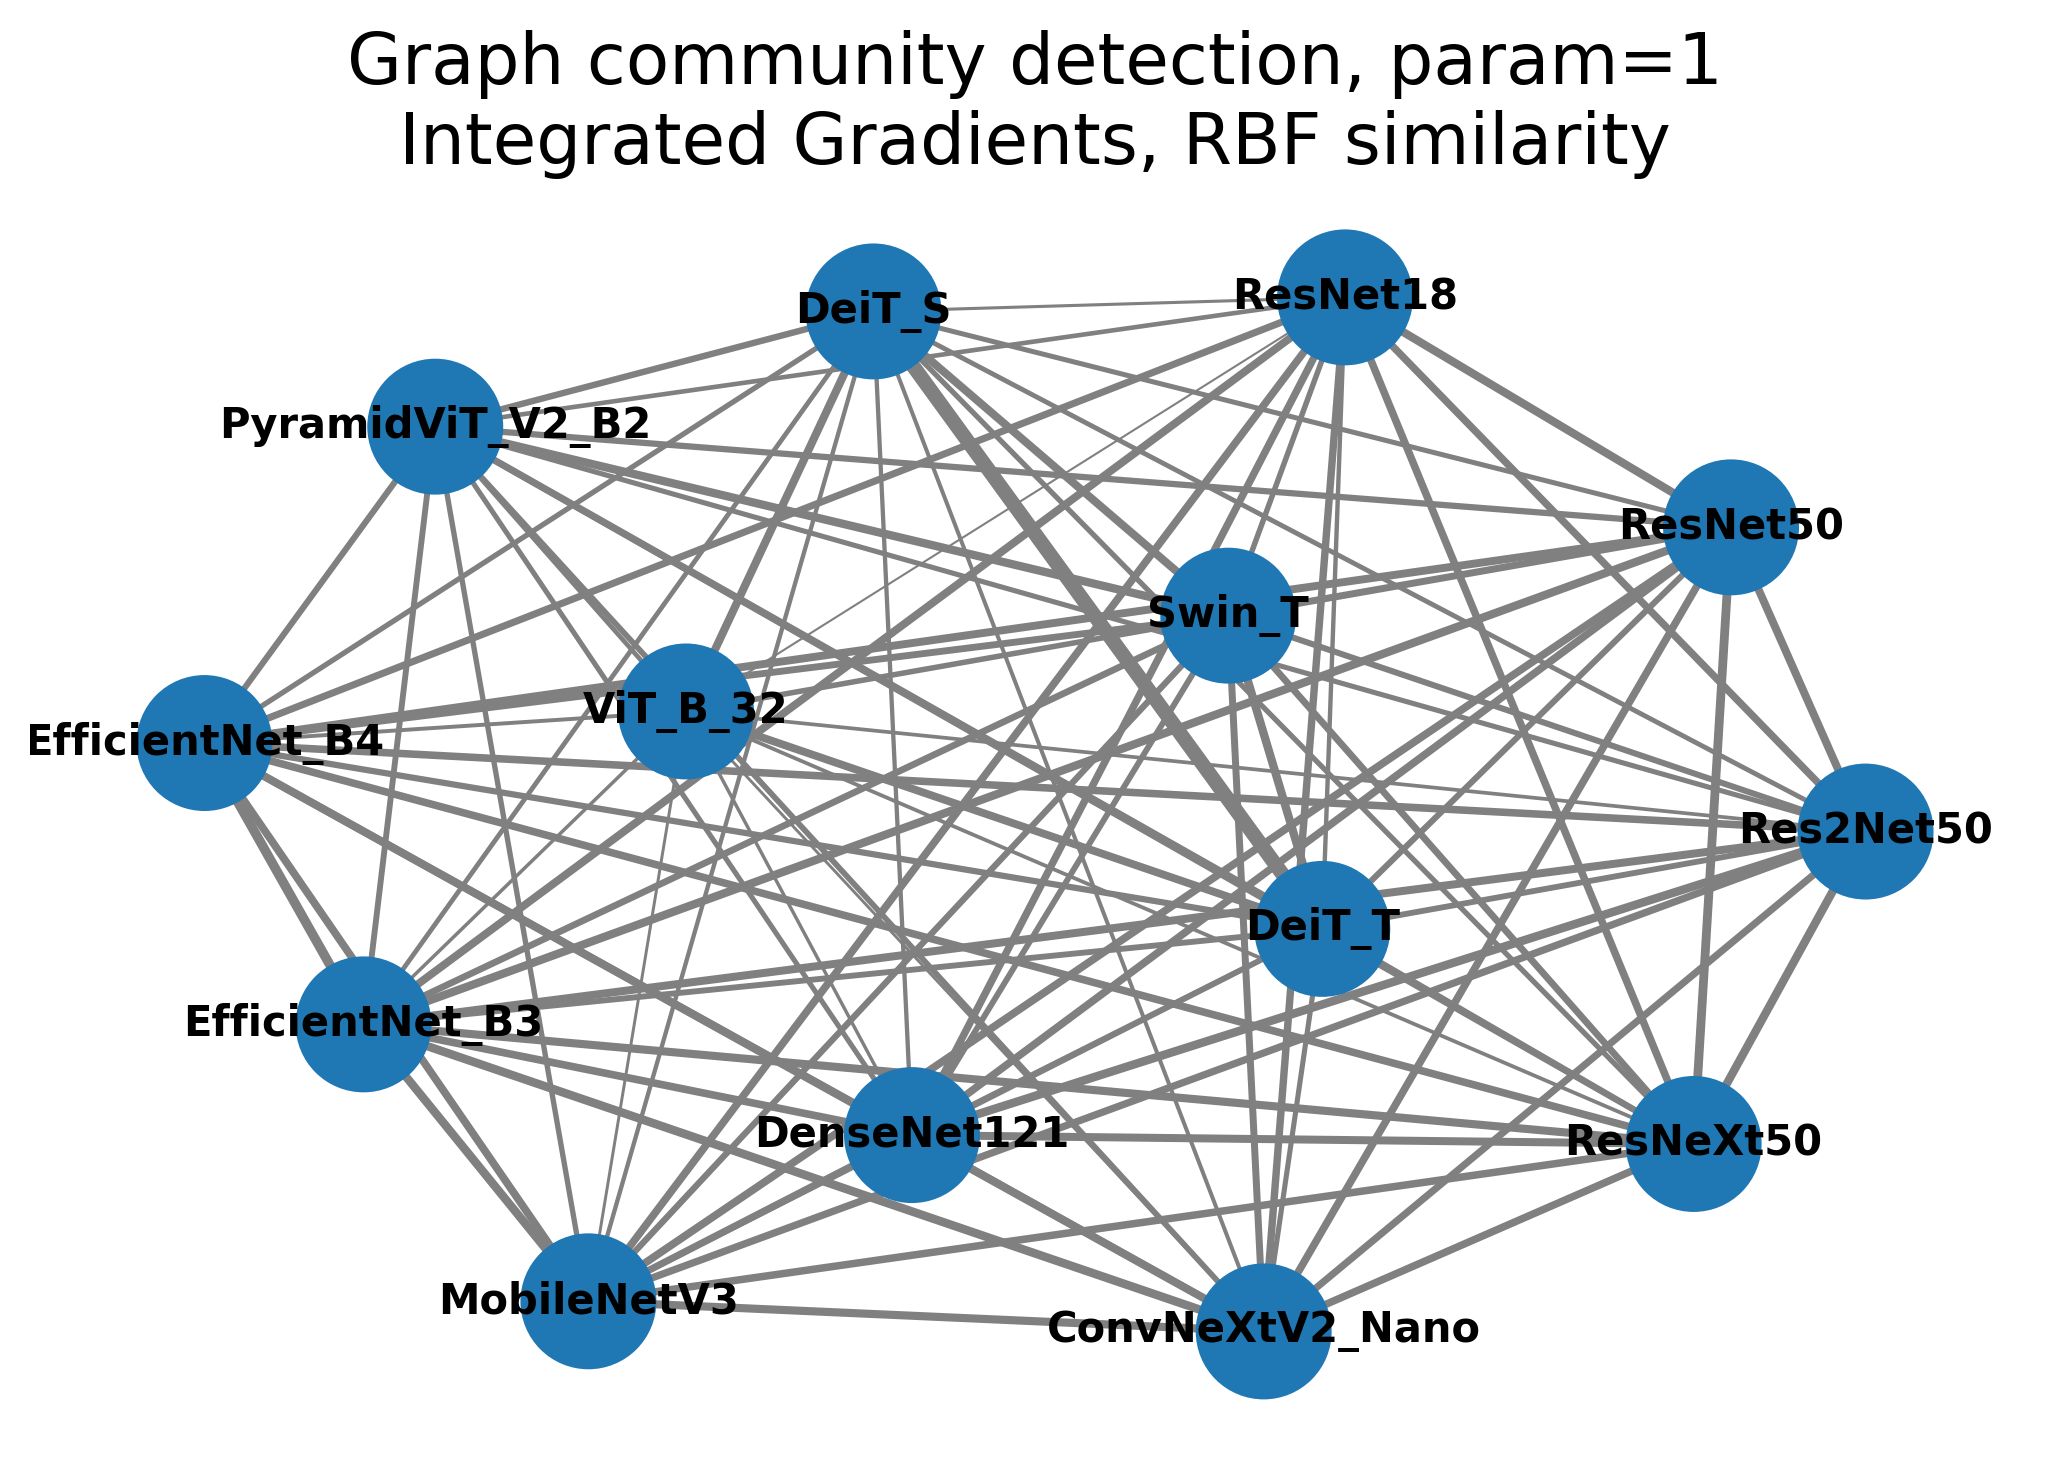

In [14]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

for csv_name in similarity_matriced_csvs:
    resolution = tweaked_csv_name_to_resolution_mapping[csv_name]
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Graph community detection, param={resolution}\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_all.png'


    # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
    df = 1 - pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 0)
    G = nx.from_pandas_adjacency(df)
    communities = louvain_communities(G, resolution=resolution, seed=42)
    plot_communities(communities, title=title, output_filename=output_filename)


# Hierarchical clustering

In [15]:
# loaded as dissimilarity, so we invert it to similarity by substracting it from 1
df = 1 - pd.read_csv(similarity_matriced_csvs[0], index_col=0)
np.fill_diagonal(df.values, 1)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          1.000000  0.333237  0.393329     0.561771   
DeiT_S                   0.333237  1.000000  0.569573     0.374720   
DeiT_T                   0.393329  0.569573  1.000000     0.428006   
DenseNet121              0.561771  0.374720  0.428006     1.000000   
EfficientNet_B3          0.585614  0.346731  0.407240     0.574999   
EfficientNet_B4          0.574773  0.370231  0.424884     0.569416   
MobileNetV3              0.580286  0.343853  0.407234     0.564425   
PyramidViT_V2_B2         0.497454  0.387975  0.431438     0.497446   
Res2Net50                0.553650  0.362355  0.416913     0.600329   
ResNet18                 0.581633  0.346748  0.409699     0.591810   
ResNet50                 0.563283  0.366747  0.424562     0.577484   
ResNeXt50                0.553830  0.361321  0.410806     0.580062   
Swin_T                   0.510769  0.400984  0.434410     0.494788   
ViT_B_32                 0.386516  0.403514  0.416457     0.425642   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.585614         0.574773     0.580286   
DeiT_S                   0.346731         0.370231     0.343853   
DeiT_T                   0.407240         0.424884     0.407234   
DenseNet121              0.574999         0.569416     0.564425   
EfficientNet_B3          1.000000         0.608714     0.582472   
EfficientNet_B4          0.608714         1.000000     0.566331   
MobileNetV3              0.582472         0.566331     1.000000   
PyramidViT_V2_B2         0.494201         0.503026     0.484226   
Res2Net50                0.571121         0.560983     0.557054   
ResNet18                 0.587906         0.569215     0.586175   
ResNet50                 0.576752         0.569444     0.567383   
ResNeXt50                0.564275         0.553349     0.553389   
Swin_T                   0.492625         0.499024     0.489897   
ViT_B_32                 0.395240         0.413600     0.387002   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.497454   0.553650  0.581633  0.563283   0.553830   
DeiT_S                    0.387975   0.362355  0.346748  0.366747   0.361321   
DeiT_T                    0.431438   0.416913  0.409699  0.424562   0.410806   
DenseNet121               0.497446   0.600329  0.591810  0.577484   0.580062   
EfficientNet_B3           0.494201   0.571121  0.587906  0.576752   0.564275   
EfficientNet_B4           0.503026   0.560983  0.569215  0.569444   0.553349   
MobileNetV3               0.484226   0.557054  0.586175  0.567383   0.553389   
PyramidViT_V2_B2          1.000000   0.478801  0.490620  0.509625   0.491121   
Res2Net50                 0.478801   1.000000  0.579463  0.572928   0.573885   
ResNet18                  0.490620   0.579463  1.000000  0.598096   0.575081   
ResNet50                  0.509625   0.572928  0.598096  1.000000   0.586791   
ResNeXt50                 0.491121   0.573885  0.575081  0.586791   1.000000   
Swin_T                    0.526896   0.481466  0.492628  0.507486   0.492220   
ViT_B_32                  0.418018   0.412252  0.396304  0.403281   0.399301   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.510769  0.386516  
DeiT_S            0.400984  0.403514  
DeiT_T            0.434410  0.416457  
DenseNet121       0.494788  0.425642  
EfficientNet_B3   0.492625  0.395240  
EfficientNet_B4   0.499024  0.413600  
MobileNetV3       0.489897  0.387002  
PyramidViT_V2_B2  0.526896  0.418018  
Res2Net50         0.481466  0.412252  
ResNet18          0.492628  0.396304  
ResNet50          0.507486  0.403281  
ResNeXt50         0.492220  0.399301  
Swin_T            1.000000  0.407297  
ViT_B_32          0.407297  1.000000

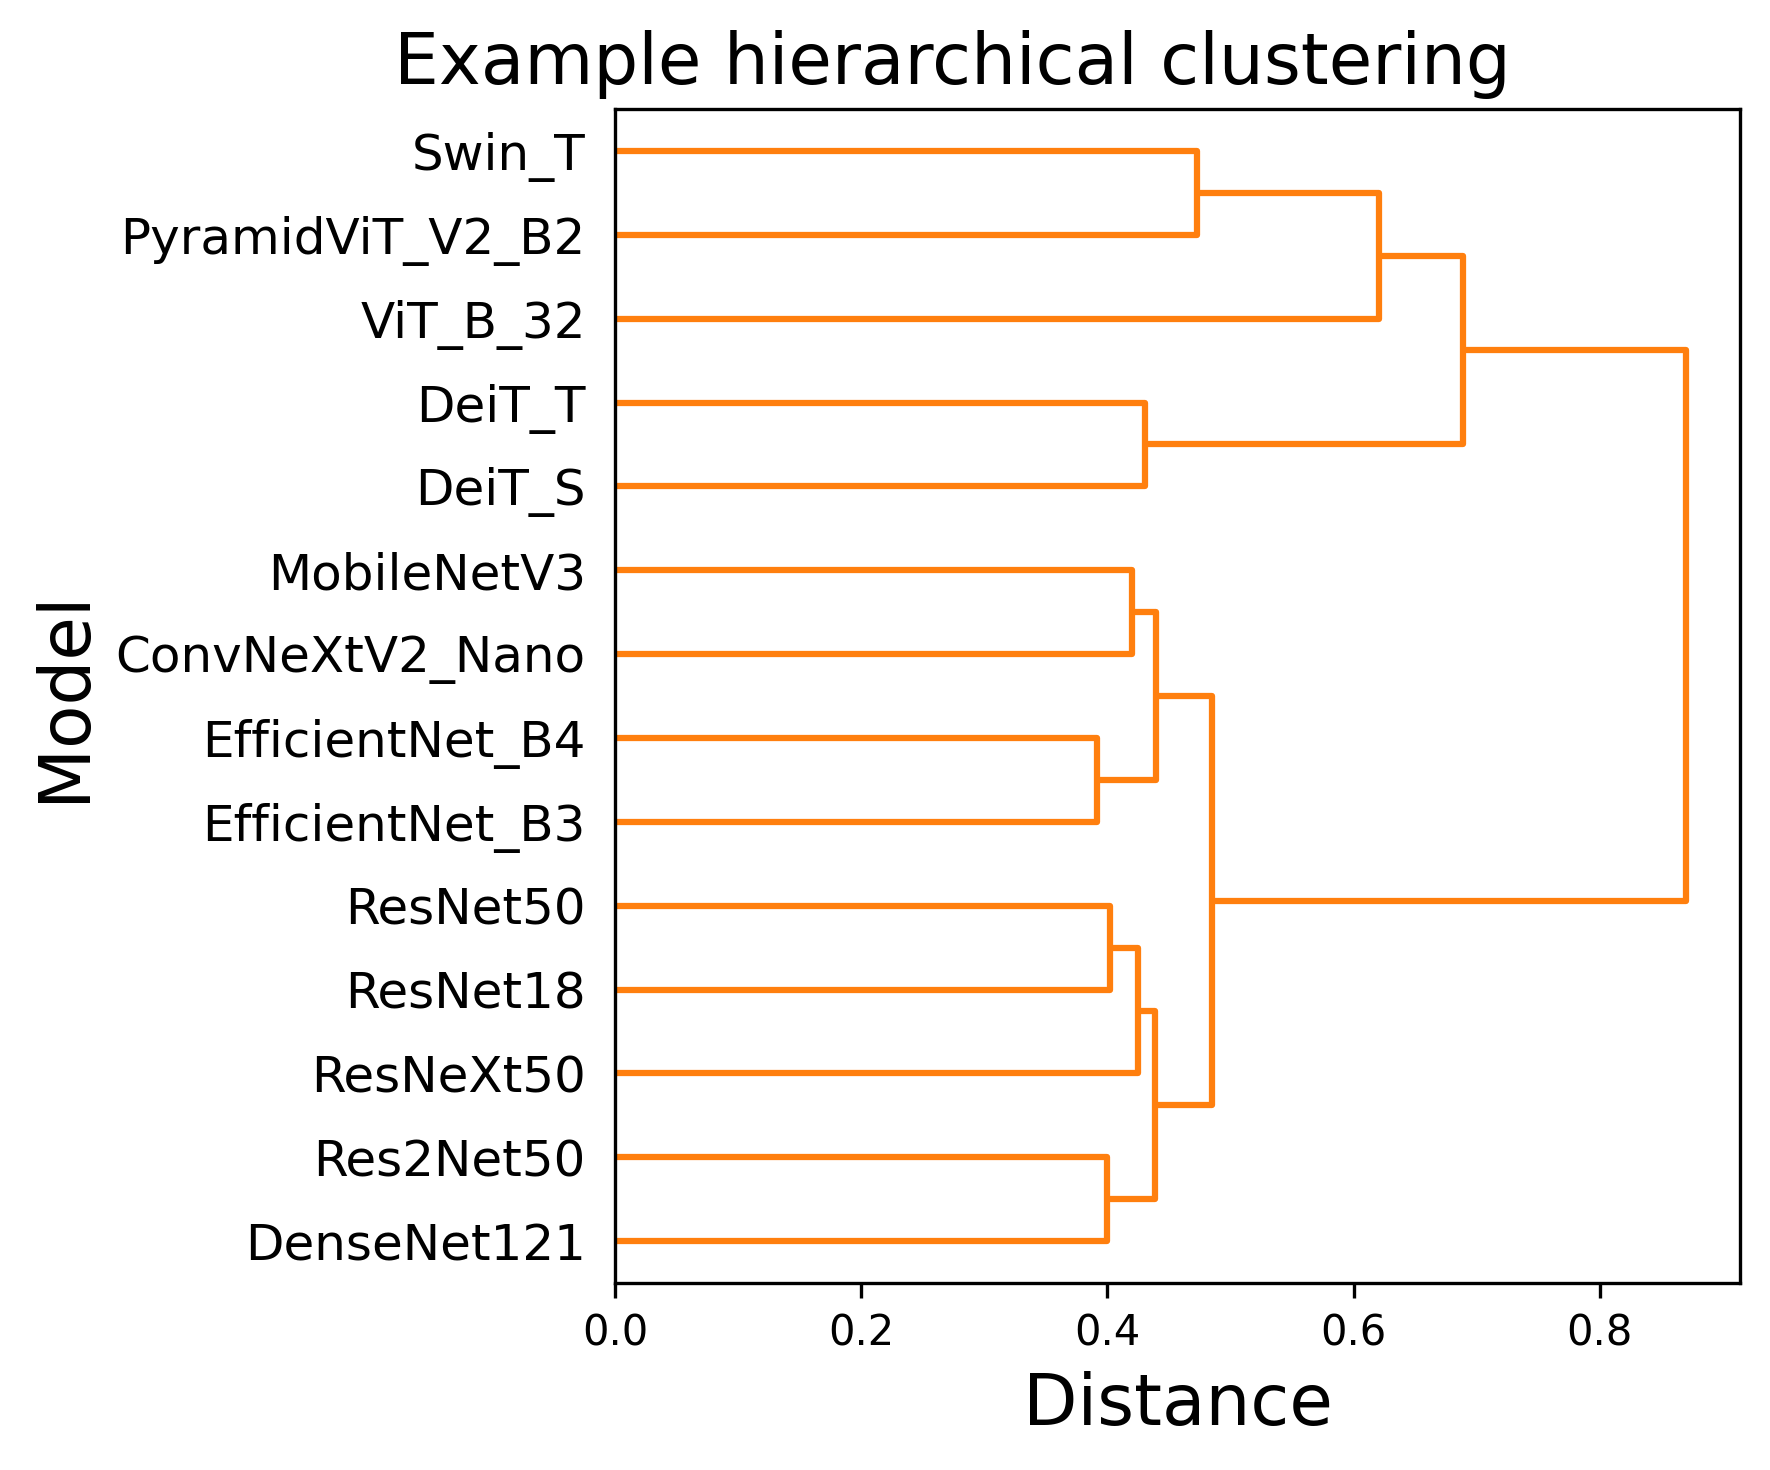

cluster
ConvNeXtV2_Nano         0
DenseNet121             0
EfficientNet_B3         0
EfficientNet_B4         0
MobileNetV3             0
Res2Net50               0
ResNet18                0
ResNet50                0
ResNeXt50               0
DeiT_S                  1
DeiT_T                  1
PyramidViT_V2_B2        2
Swin_T                  2
ViT_B_32                2

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04):
    similarity_matrix = df.values
    # convert similarity to distance again
    distance_matrix = 1 - similarity_matrix
    # set diagonal to 0
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method='ward')
    plt.figure(figsize=(6, 5), dpi=300)
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title, fontsize=17, x=0.3)
    # move title to be centered not above the plot but a bit to the left
    plt.ylabel('Model', fontsize=17)
    plt.xlabel('Distance', fontsize=17)
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df

Z, clusters = hierarchical_clustering(df, title="Example hierarchical clustering")
clusters


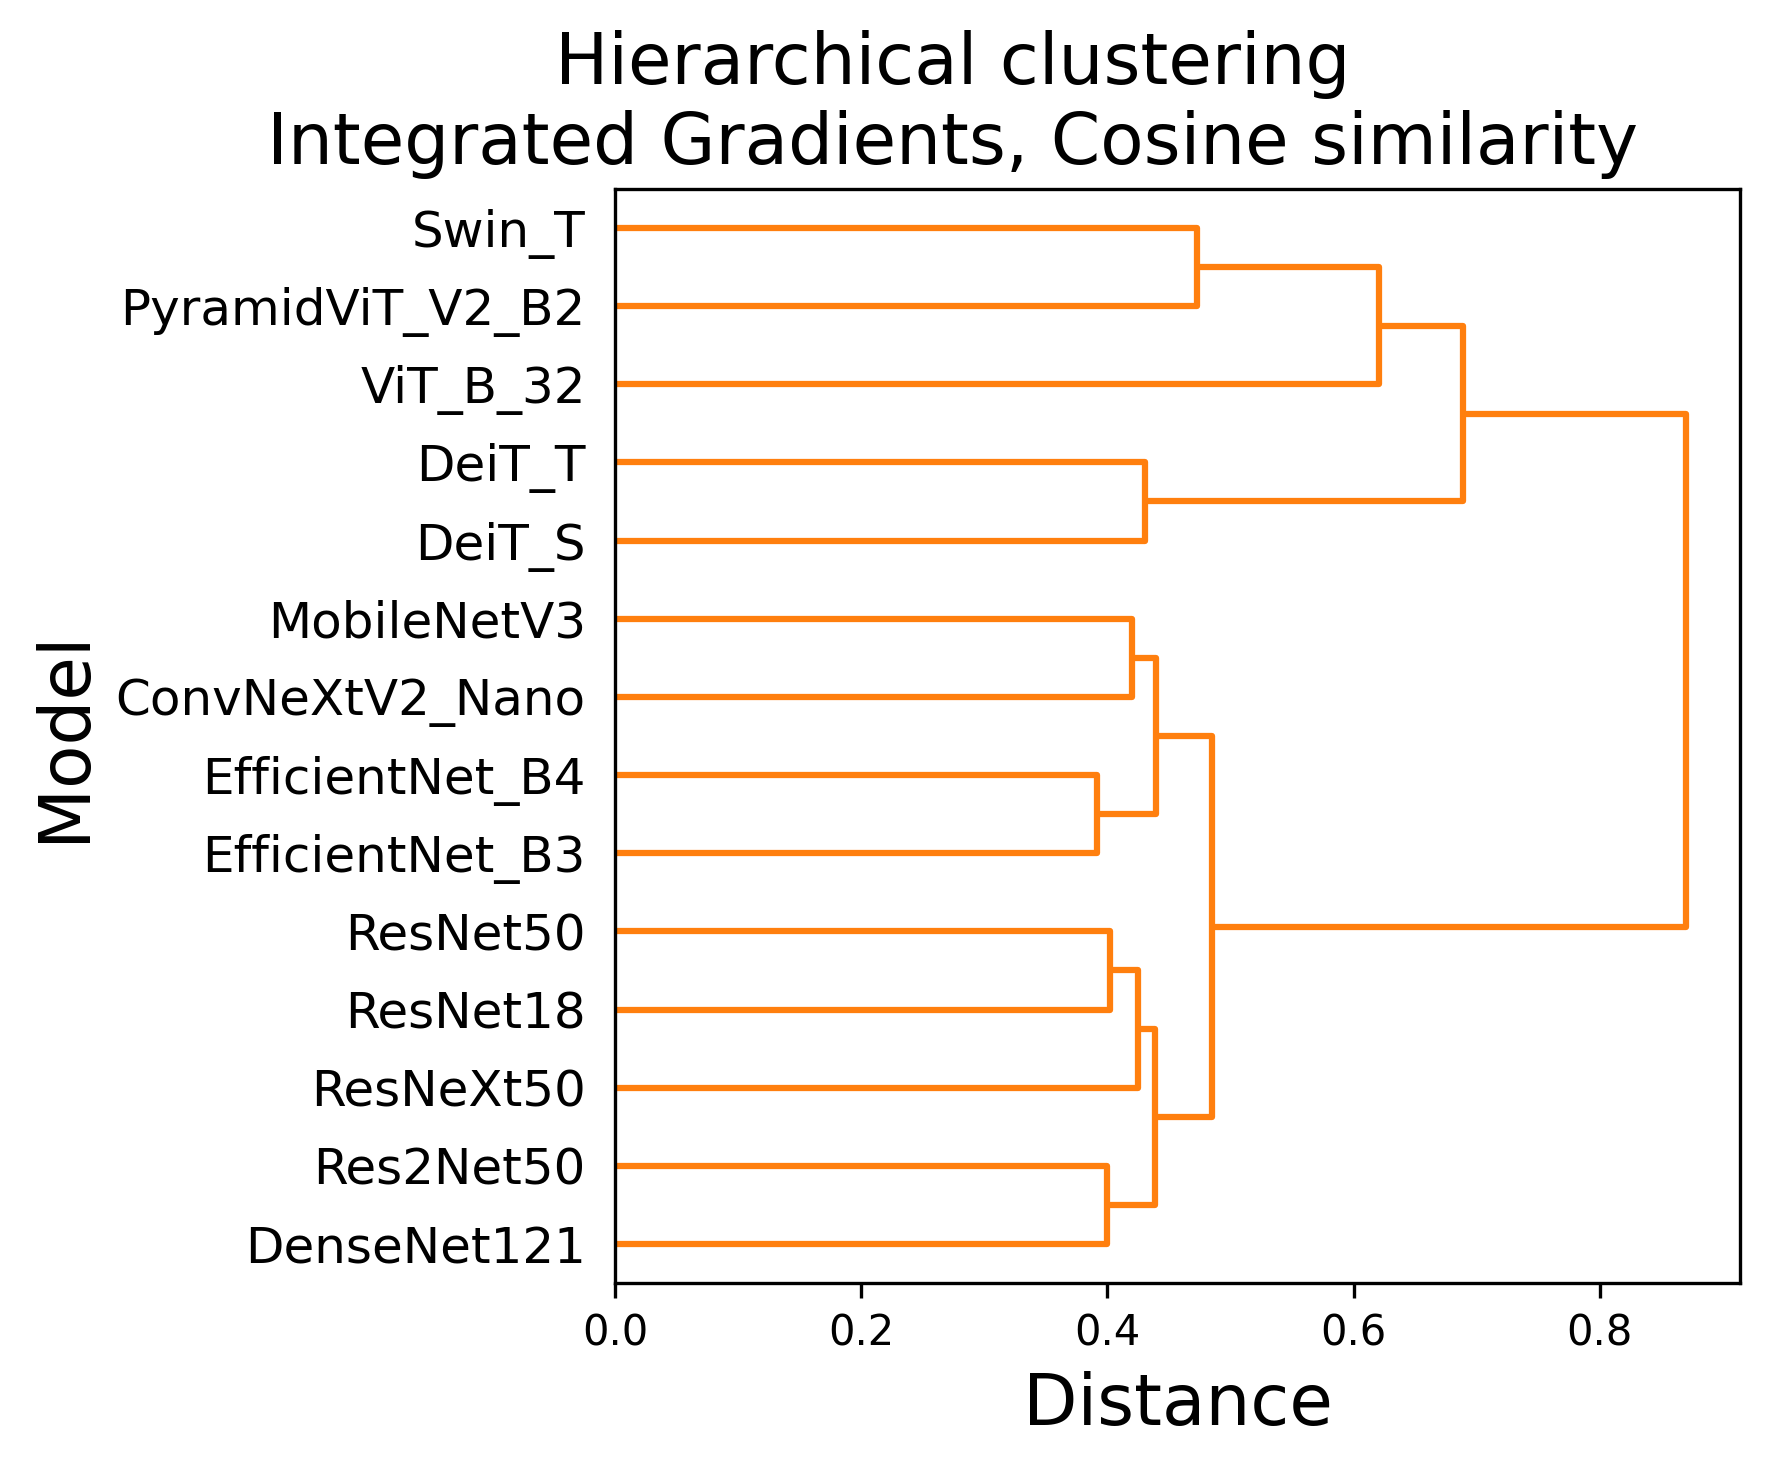

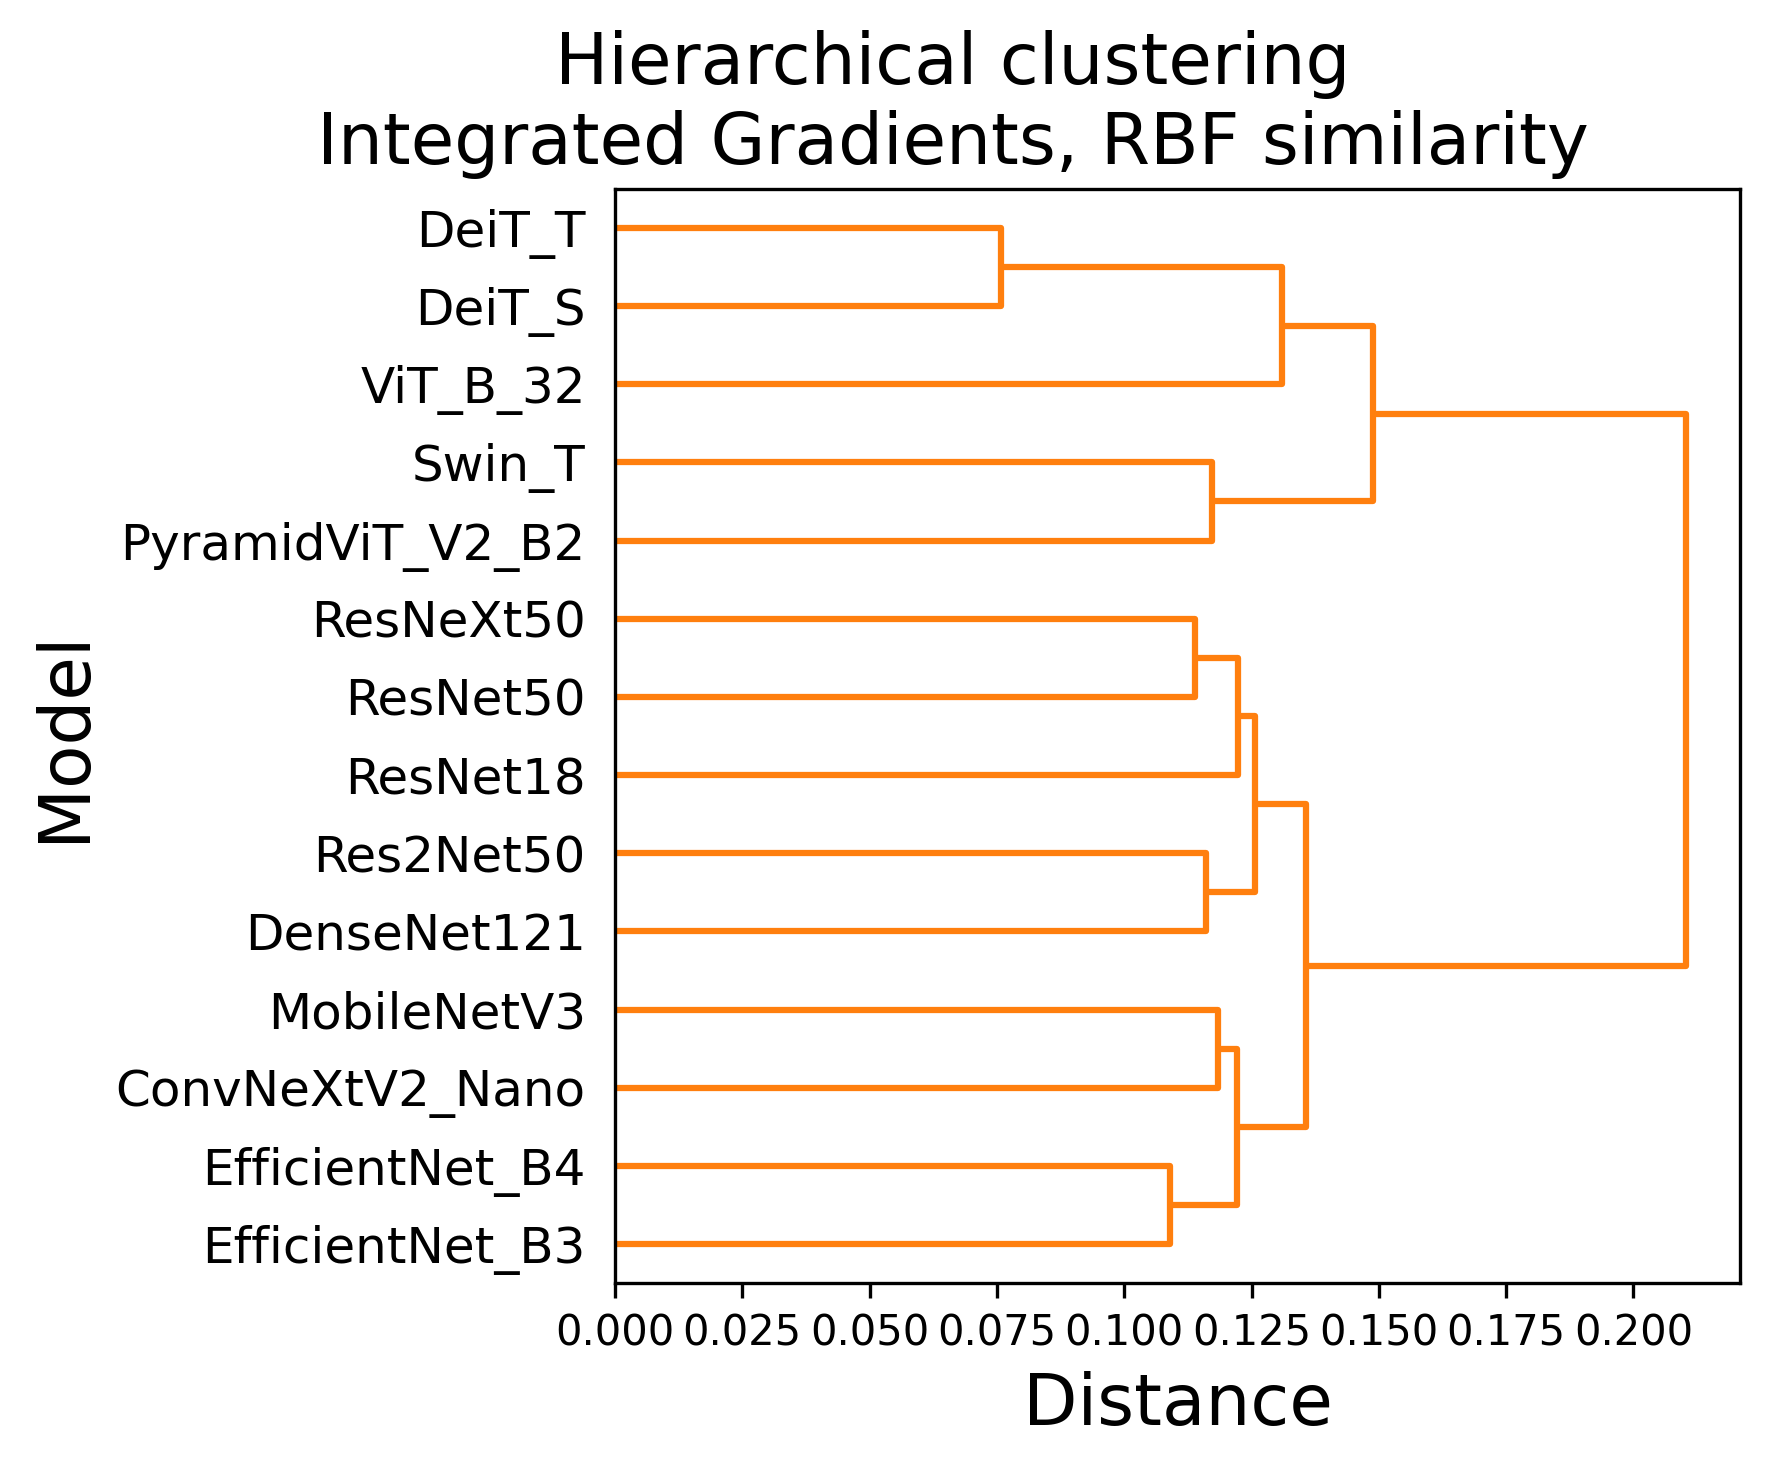

In [17]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Hierarchical clustering\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_all.png'

    # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
    df = 1-pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 1)
    Z, clusters = hierarchical_clustering(df, title=title, output_filename=output_filename, color_threshold=2) # 2 makes all same color